In [1]:
#!pip install tensorflow keras


In [2]:
import yfinance as yf
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [4]:
#I tried to implement more stocks but i could only do 1 at a time for the final result
stock_symbol = 'AAPL','MSFT', 'GOOGL'
df = yf.download(tickers=stock_symbol, period='3y', interval='1d')

[*********************100%***********************]  3 of 3 completed


In [5]:
type(df)
df.head()

Adj Close                             Close             \
                 AAPL      GOOGL        MSFT       AAPL      GOOGL   
Date                                                                 
2020-05-11  77.426285  70.179497  181.586411  78.752502  70.179497   
2020-05-12  76.541435  68.759003  177.473129  77.852501  68.759003   
2020-05-13  75.617271  67.416496  174.789307  76.912498  67.416496   
2020-05-14  76.081818  67.843002  175.547775  77.385002  67.843002   
2020-05-15  75.632019  68.653000  178.105225  76.927498  68.653000   

                             High                               Low  \
                  MSFT       AAPL      GOOGL        MSFT       AAPL   
Date                                                                  
2020-05-11  186.740005  79.262497  70.776497  187.509995  76.809998   
2020-05-12  182.509995  79.922501  70.716499  187.039993  77.727501   
2020-05-13  179.750000  78.987503  69.266502  184.050003  75.802498   
2020-05-14  180.529999  77.447502  67.868500  180.690002  75.382500   
2020-05-15  183.160004  76.974998  68.728996  187.059998  75.052498   

                                        Open                         \
                GOOGL        MSFT       AAPL      GOOGL        MSFT   
Date                                                                  
2020-05-11  68.775002  182.850006  77.025002  68.839500  183.149994   
2020-05-12  68.725502  182.300003  79.457497  70.411003  186.800003   
2020-05-13  66.400497  176.539993  78.037498  68.807999  182.550003   
2020-05-14  66.165001  175.679993  76.127502  66.676003  177.539993   
2020-05-15  66.949997  177.000000  75.087502  67.413002  179.059998   

               Volume                      
                 AAPL     GOOGL      MSFT  
Date                                       
2020-05-11  145946400  32718000  30892700  
2020-05-12  162301200  33918000  32038200  
2020-05-13  200622400  40368000  44711500  
2020-05-14  158929200  36660000  41873900  
2020-05-15  166348400  41544000  46610400

In [43]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45285300


In [44]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-05-12,6.614643,6.745357,6.530357,6.720000,5.719513,818563200
1,2008-05-13,6.736071,6.837500,6.709286,6.784286,5.774229,823236400
2,2008-05-14,6.829643,6.865714,6.627500,6.652143,5.661762,916823600
3,2008-05-15,6.671786,6.782143,6.578571,6.776071,5.767239,873208000
4,2008-05-16,6.789643,6.796429,6.678571,6.700714,5.703100,765769200


In [45]:
df=df.drop(['Date','Adj Close'], axis =1)


In [46]:
df.head()

,Open,High,Low,Close,Volume
0,6.614643,6.745357,6.530357,6.720000,818563200
1,6.736071,6.837500,6.709286,6.784286,823236400
2,6.829643,6.865714,6.627500,6.652143,916823600
3,6.671786,6.782143,6.578571,6.776071,873208000
4,6.789643,6.796429,6.678571,6.700714,765769200


In [47]:
df.tail()


,Open,High,Low,Close,Volume
3770,169.500000,170.919998,167.160004,167.449997,65136000
3771,164.889999,167.039993,164.309998,165.789993,81235400
3772,170.979996,174.300003,170.759995,173.570007,113316400
3773,172.479996,173.850006,172.110001,173.500000,55962800
3774,173.050003,173.539993,171.600006,171.770004,45285300


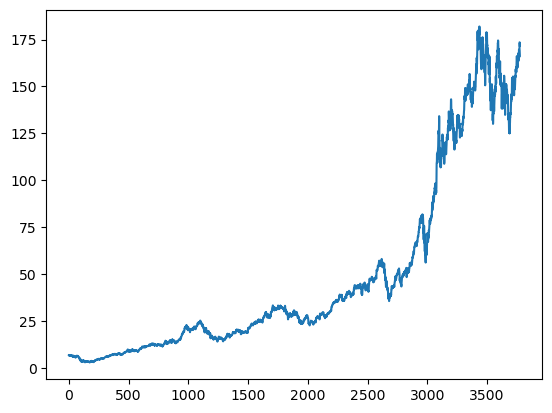

In [48]:
plt.plot(df.Close)


(3775, 5)

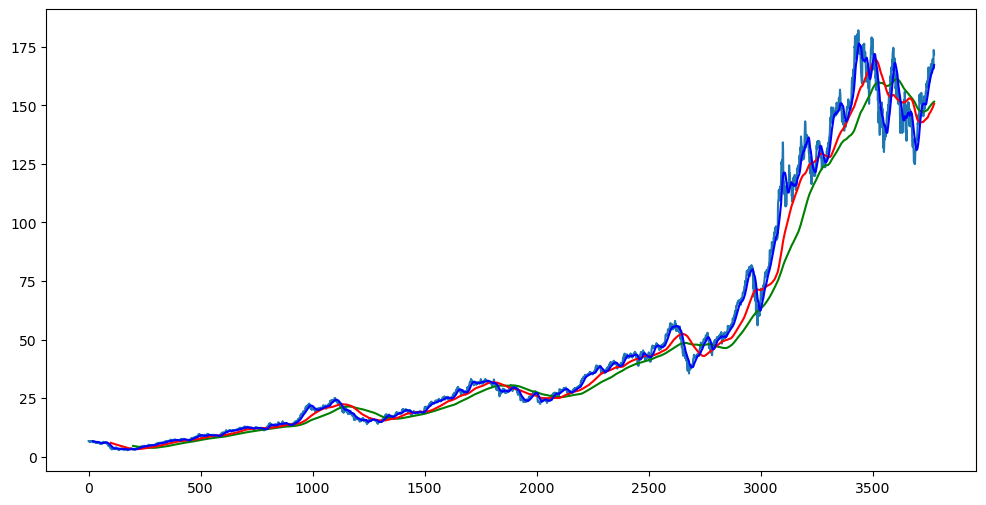

In [49]:
ma20=df.Close.rolling(20).mean()
ma20
ma100=df.Close.rolling(100).mean()
ma100
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')
plt.plot(ma20,'b')
df.shape


In [50]:
df.shape


(3775, 5)

In [51]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2642, 1)
(1133, 1)


In [52]:
data_training.head()

,Close
0,6.720000
1,6.784286
2,6.652143
3,6.776071
4,6.700714


In [53]:
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.07111214],
       [0.07227623],
       [0.0698834 ],
       ...,
       [0.95540937],
       [0.88868189],
       [0.86201808]])

In [54]:
data_training_array.shape


(2642, 1)

In [55]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)

In [56]:
x_train.shape


(2542, 100, 1)

In [57]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2)) 

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [58]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
80/80 [==============================] - 22s 248ms/step - loss: 0.0209
Epoch 2/50
80/80 [==============================] - 22s 265ms/step - loss: 0.0051
Epoch 3/50
80/80 [==============================] - 21s 258ms/step - loss: 0.0047
Epoch 4/50
80/80 [==============================] - 13s 163ms/step - loss: 0.0042
Epoch 5/50
80/80 [==============================] - 13s 162ms/step - loss: 0.0037
Epoch 6/50
80/80 [==============================] - 13s 161ms/step - loss: 0.0038
Epoch 7/50
80/80 [==============================] - 13s 161ms/step - loss: 0.0034
Epoch 8/50
80/80 [==============================] - 13s 162ms/step - loss: 0.0030
Epoch 9/50
80/80 [==============================] - 13s 162ms/step - loss: 0.0033
Epoch 10/50
80/80 [==============================] - 13s 162ms/step - loss: 0.0031
Epoch 11/50
80/80 [==============================] - 13s 164ms/step - loss: 0.0029
Epoch 12/50
80/80 [==============================] - 13s 164ms/step - loss: 0.0028
Epoch 13/50
8

In [60]:
model.save('keras_model.h5')


In [61]:
data_testing.head(100)


,Close
2642,50.942501
2643,52.487499
2644,52.122501
2645,51.117500
2646,48.542500
...,...
2737,47.117500
2738,47.180000
2739,47.487499
2740,47.810001


In [62]:
data_training.tail(100)


,Close
2542,47.209999
2543,47.185001
2544,46.422501
2545,46.625000
2546,46.365002
...,...
2637,53.325001
2638,54.715000
2639,55.555000
2640,51.869999


In [77]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()


C:\Users\justi\AppData\Local\Temp\ipykernel_16112\2164542419.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


,Close
0,47.209999
1,47.185001
2,46.422501
3,46.625000
4,46.365002


In [78]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.07962788],
       [0.07945721],
       [0.07425109],
       ...,
       [0.94237441],
       [0.94189642],
       [0.93008456]])

In [79]:
input_data.shape

(1233, 1)

In [80]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [81]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1133, 100, 1)
(1133,)


In [82]:
y_predicted=model.predict(x_test)


36/36 [==============================] - 1s 35ms/step


In [83]:
y_predicted.shape


(1133, 1)

In [84]:
y_predicted


array([[0.17524783],
       [0.17463022],
       [0.17395705],
       ...,
       [0.81918347],
       [0.8210455 ],
       [0.82349825]], dtype=float32)

In [85]:
scaler.scale_


array([0.00682769])

In [86]:
scale_factor=1/0.01162115
y_predicted =y_predicted*scale_factor
y_test=y_test*scale_factor

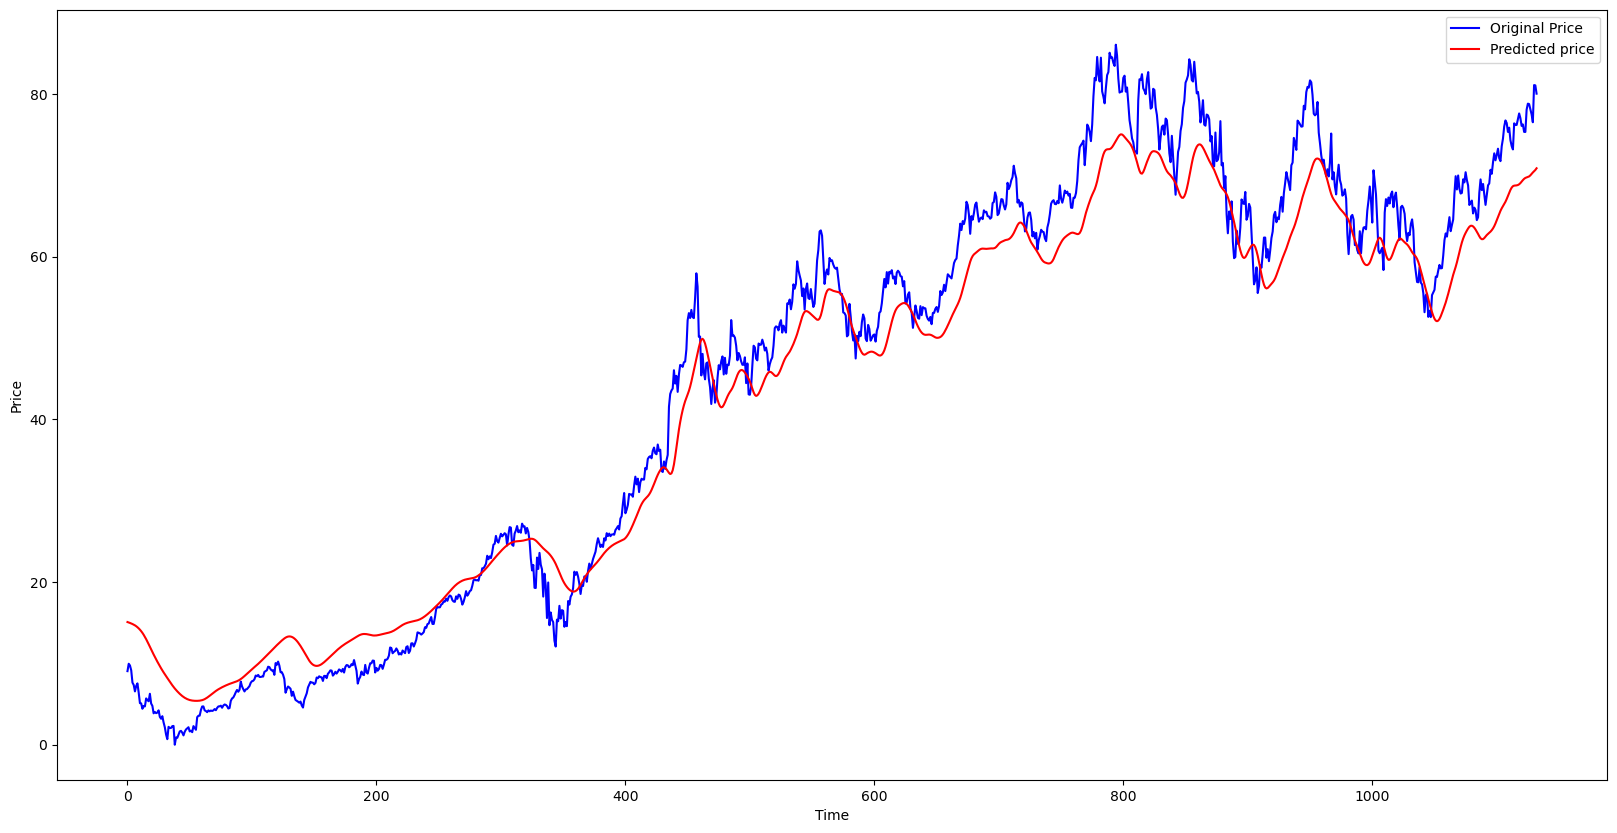

In [87]:
plt.figure(figsize=(20,10))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#the reason i choose aapl and to do the last 3 year is because they are a industry leader, while also maintaining a strong
#part of the SPX. Also I chose 3 years because that is about when covid started, and we began to see irregular trading
#patterns. So with this said, I think the pre 2020 stock numbers could be a negative catalyst for short term trading goals.